## Convolutional Neural Networks

we train a CNN to classify images from the CIFAR-10 database






Load CIFAR10 --> built in in Keras

In [17]:
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [13]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

**Data Visualization**

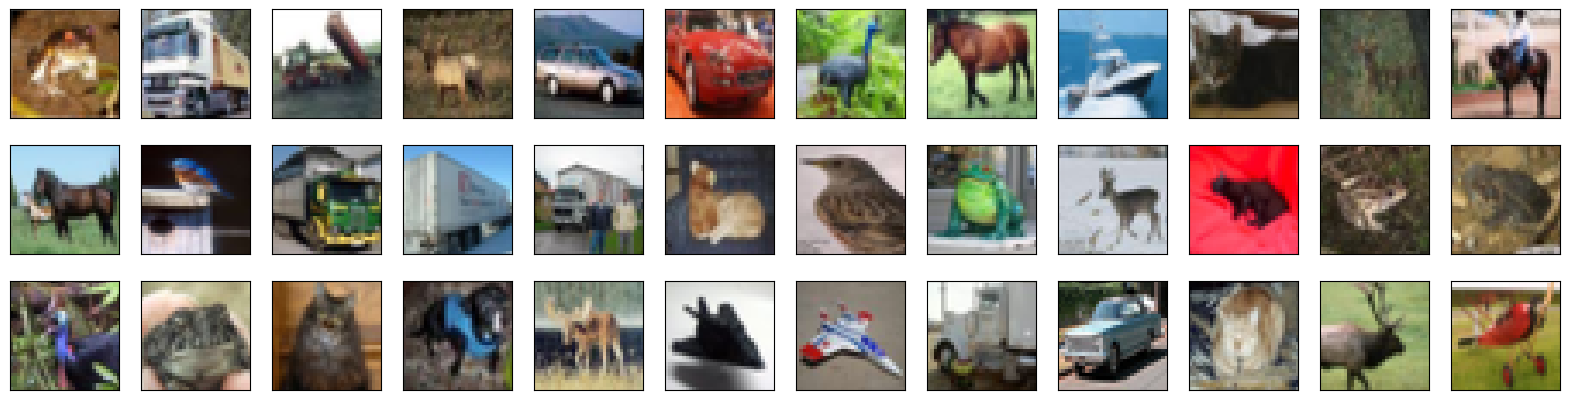

In [14]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

**Rescale the Images**

In [15]:

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

**split the dataset**

In [16]:
# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


**Create and Configure Augmented Image Generator**

In [18]:
simplified_datagen_train = ImageDataGenerator(
    width_shift_range=0.08,
    height_shift_range=0.08,
    rotation_range=9,
    zoom_range=0.08,
    shear_range=0.08,
    channel_shift_range=0.08,
    horizontal_flip=True,
    fill_mode='nearest',
)

# Fit simplified image generator on data
simplified_datagen_train.fit(x_train)

**Visualize Original and Augmented Images**

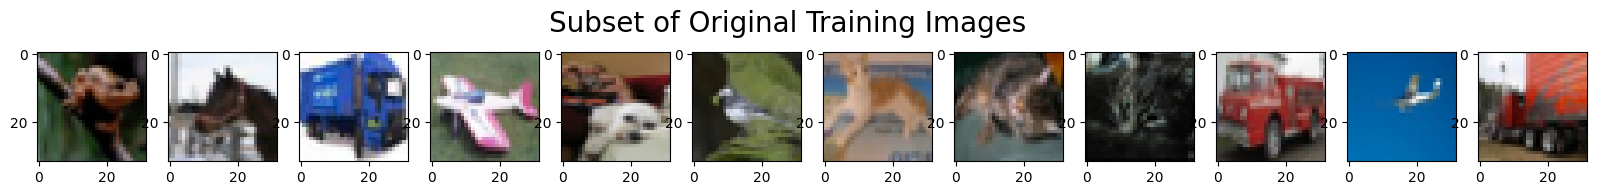

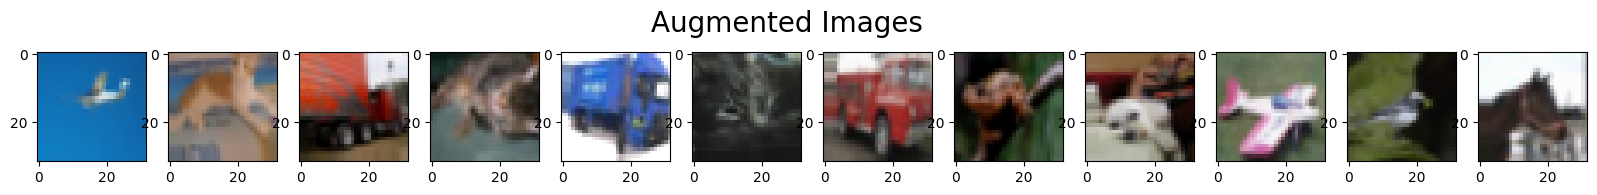

In [19]:
x_train_subset = x_train[:12]

fig = plt.figure(figsize=(20,2))
for i in range(0, len(x_train_subset)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(x_train_subset[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# visualize augmented images
fig = plt.figure(figsize=(20,2))
for x_batch in simplified_datagen_train.flow(x_train_subset, batch_size=12):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;

**Built the model**

In [20]:
model2 = Sequential()
model2.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.3))
model2.add(Flatten())
model2.add(Dense(500, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(10, activation='softmax'))

model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 16)          │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 32)          │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 64)            │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │         512,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 528,502 (2.02 MB)

 Trainable params: 528,278 (2.02 MB)

 Non-trainable params: 224 (896.00 B)

**Compile the model**

In [21]:
model2.compile(loss='categorical_crossentropy', optimizer='Adam',
                  metrics=['accuracy'])

**Train the Model**

In [25]:
checkpointer = ModelCheckpoint(filepath='model222.keras', verbose=1,
                               save_best_only=True)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
batch_size = 32
epochs = 100

# Train the model with updated data generator and callbacks
history = model2.fit(simplified_datagen_train.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=x_train.shape[0] // batch_size, epochs=100, verbose=2,
                    validation_data=(x_valid, y_valid),
                    callbacks=[checkpointer])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 1.11444, saving model to model222.keras
1406/1406 - 100s - 71ms/step - accuracy: 0.5731 - loss: 1.2082 - val_accuracy: 0.6058 - val_loss: 1.1144
Epoch 2/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss did not improve from 1.11444
1406/1406 - 2s - 1ms/step - accuracy: 0.5625 - loss: 1.4801 - val_accuracy: 0.5954 - val_loss: 1.1556
Epoch 3/100

Epoch 3: val_loss improved from 1.11444 to 0.91147, saving model to model222.keras
1406/1406 - 98s - 70ms/step - accuracy: 0.5994 - loss: 1.1376 - val_accuracy: 0.6844 - val_loss: 0.9115
Epoch 4/100

Epoch 4: val_loss did not improve from 0.91147
1406/1406 - 3s - 2ms/step - accuracy: 0.5938 - loss: 1.2135 - val_accuracy: 0.6816 - val_loss: 0.9151
Epoch 5/100

Epoch 5: val_loss did not improve from 0.91147
1406/1406 - 100s - 71ms/step - accuracy: 0.6175 - loss: 1.0918 - val_accuracy: 0.6758 - val_loss: 0.9352
Epoch 6/100

Epoch 6: val_loss did not improve from 0.91147
1406/1406 - 2s - 1ms/step - accuracy: 0.6875 - loss: 1.1432 - val_accuracy: 0.6770 - val_loss: 0.9357
Epoch 7/100

Epoch 7: val_loss did not improve from 0.91147
1406/1406 - 141s - 101ms/step - accuracy: 0.6309 - loss: 1.0504 - val_accuracy: 0.6708 - val_loss: 0.

KeyboardInterrupt: 

In [26]:
model2.save('model2.keras')

**Evaluate the Model**

In [27]:
model2.load_weights('model2.keras')

In [28]:
test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=2)

print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

313/313 - 3s - 10ms/step - accuracy: 0.7725 - loss: 0.6513
Test accuracy: 0.7724999785423279, Test loss: 0.6512760519981384


**Prediction**

In [29]:
y_hat = model2.predict(x_test)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


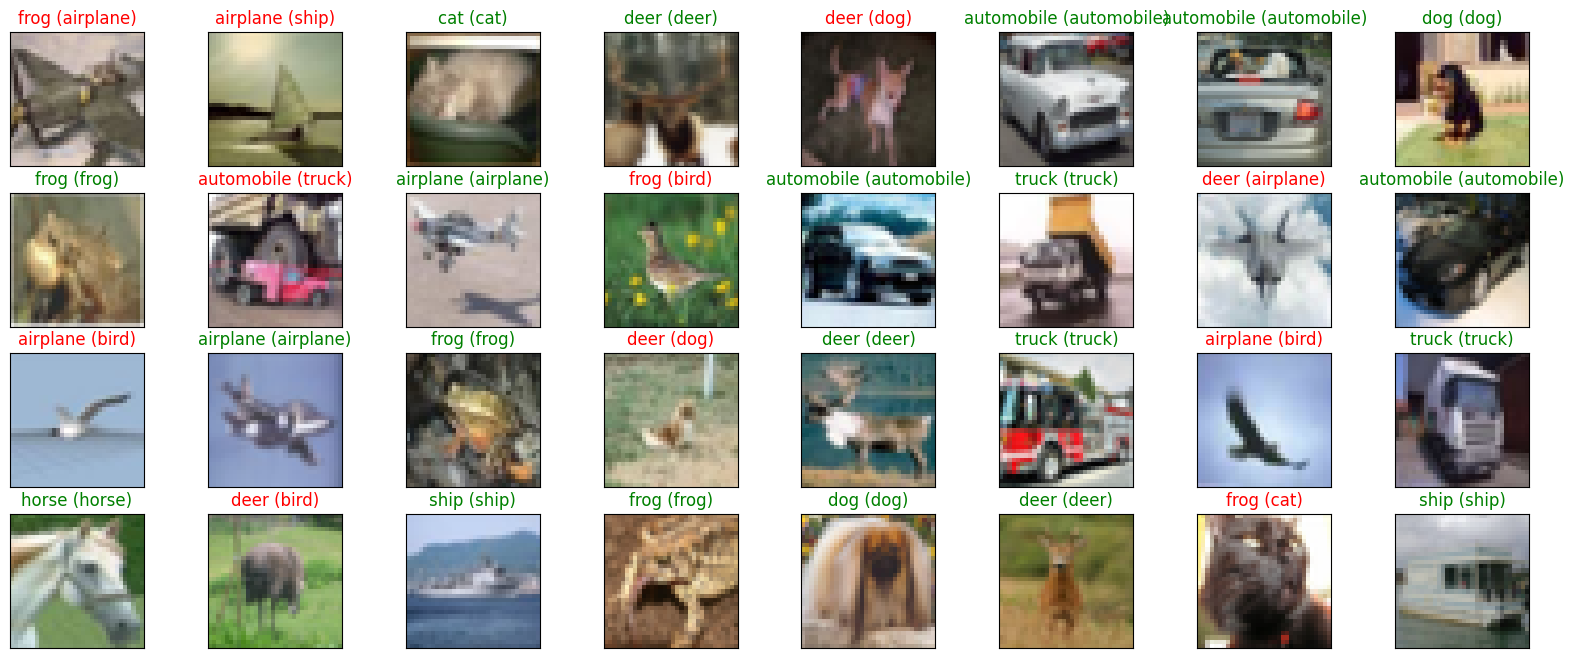

In [31]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))